# 富集分析

In [ ]:
!pip install gseapy # GESA

In [2]:
import pandas as pd
import gseapy  as gp

In [3]:
# Import the output table of CRISPR screens as dataframe
df = pd.read_table("datasets/PRMT5_DMSO_differential.txt")
df

,Gene,Category,PRMT5_biased,DMSO_biased,PRMT5,DMSO,Z,P(-),FDR(-),P(+),FDR(+),P(replicates),FDR(replicates),P(sgRNAs),FDR(sgRNAs)
0,PPP4C,Other,-1.391712,-0.920506,-1.420999,-0.892814,-5.175958,1.133724e-07,0.000127,1.000000,1.000000,0.002847,0.793765,0.000004,0.001238
1,PRMT5,Other,-0.745324,-0.266945,-0.770068,-0.265418,-4.945346,3.800432e-07,0.000212,1.000000,1.000000,0.007508,0.793765,0.000004,0.001238
2,HDGFRP2,Other,-0.413583,-0.009660,-0.417287,-0.009358,-3.997596,3.199448e-05,0.011923,0.999968,1.000000,0.009832,0.793765,0.000155,0.019252
3,SMNDC1,Other,-1.115249,-0.787404,-1.160153,-0.766771,-3.855049,5.785314e-05,0.016170,0.999942,1.000000,0.040122,0.793765,0.000004,0.001238
4,PRMT1,Other,-0.348763,0.026136,-0.351032,0.028911,-3.723365,9.829234e-05,0.021978,0.999902,1.000000,0.048504,0.793765,0.000677,0.058264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UBE3D,Other,0.496689,0.161840,0.505475,0.161485,3.370299,9.996246e-01,0.999997,0.000375,0.072727,0.000330,0.368602,0.005663,0.237074
1114,METTL3,Other,-0.184093,-0.559196,-0.194697,-0.546443,3.446301,9.997158e-01,0.999997,0.000284,0.072727,0.109208,0.851280,0.000536,0.050743
1115,ATR,Other,-1.022823,-1.457374,-1.049647,-1.419438,3.623120,9.998545e-01,0.999997,0.000146,0.054236,0.032575,0.793765,0.000314,0.035149
1116,METTL14,Other,0.135077,-0.312501,0.135817,-0.310146,4.369509,9.999938e-01,0.999997,0.000006,0.003481,0.020534,0.793765,0.000084,0.015677


In [4]:
df["Rank"]=df.Z
df

,Gene,Category,PRMT5_biased,DMSO_biased,PRMT5,DMSO,Z,P(-),FDR(-),P(+),FDR(+),P(replicates),FDR(replicates),P(sgRNAs),FDR(sgRNAs),Rank
0,PPP4C,Other,-1.391712,-0.920506,-1.420999,-0.892814,-5.175958,1.133724e-07,0.000127,1.000000,1.000000,0.002847,0.793765,0.000004,0.001238,-5.175958
1,PRMT5,Other,-0.745324,-0.266945,-0.770068,-0.265418,-4.945346,3.800432e-07,0.000212,1.000000,1.000000,0.007508,0.793765,0.000004,0.001238,-4.945346
2,HDGFRP2,Other,-0.413583,-0.009660,-0.417287,-0.009358,-3.997596,3.199448e-05,0.011923,0.999968,1.000000,0.009832,0.793765,0.000155,0.019252,-3.997596
3,SMNDC1,Other,-1.115249,-0.787404,-1.160153,-0.766771,-3.855049,5.785314e-05,0.016170,0.999942,1.000000,0.040122,0.793765,0.000004,0.001238,-3.855049
4,PRMT1,Other,-0.348763,0.026136,-0.351032,0.028911,-3.723365,9.829234e-05,0.021978,0.999902,1.000000,0.048504,0.793765,0.000677,0.058264,-3.723365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UBE3D,Other,0.496689,0.161840,0.505475,0.161485,3.370299,9.996246e-01,0.999997,0.000375,0.072727,0.000330,0.368602,0.005663,0.237074,3.370299
1114,METTL3,Other,-0.184093,-0.559196,-0.194697,-0.546443,3.446301,9.997158e-01,0.999997,0.000284,0.072727,0.109208,0.851280,0.000536,0.050743,3.446301
1115,ATR,Other,-1.022823,-1.457374,-1.049647,-1.419438,3.623120,9.998545e-01,0.999997,0.000146,0.054236,0.032575,0.793765,0.000314,0.035149,3.623120
1116,METTL14,Other,0.135077,-0.312501,0.135817,-0.310146,4.369509,9.999938e-01,0.999997,0.000006,0.003481,0.020534,0.793765,0.000084,0.015677,4.369509


In [5]:
df

,Gene,Category,PRMT5_biased,DMSO_biased,PRMT5,DMSO,Z,P(-),FDR(-),P(+),FDR(+),P(replicates),FDR(replicates),P(sgRNAs),FDR(sgRNAs),Rank
0,PPP4C,Other,-1.391712,-0.920506,-1.420999,-0.892814,-5.175958,1.133724e-07,0.000127,1.000000,1.000000,0.002847,0.793765,0.000004,0.001238,-5.175958
1,PRMT5,Other,-0.745324,-0.266945,-0.770068,-0.265418,-4.945346,3.800432e-07,0.000212,1.000000,1.000000,0.007508,0.793765,0.000004,0.001238,-4.945346
2,HDGFRP2,Other,-0.413583,-0.009660,-0.417287,-0.009358,-3.997596,3.199448e-05,0.011923,0.999968,1.000000,0.009832,0.793765,0.000155,0.019252,-3.997596
3,SMNDC1,Other,-1.115249,-0.787404,-1.160153,-0.766771,-3.855049,5.785314e-05,0.016170,0.999942,1.000000,0.040122,0.793765,0.000004,0.001238,-3.855049
4,PRMT1,Other,-0.348763,0.026136,-0.351032,0.028911,-3.723365,9.829234e-05,0.021978,0.999902,1.000000,0.048504,0.793765,0.000677,0.058264,-3.723365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UBE3D,Other,0.496689,0.161840,0.505475,0.161485,3.370299,9.996246e-01,0.999997,0.000375,0.072727,0.000330,0.368602,0.005663,0.237074,3.370299
1114,METTL3,Other,-0.184093,-0.559196,-0.194697,-0.546443,3.446301,9.997158e-01,0.999997,0.000284,0.072727,0.109208,0.851280,0.000536,0.050743,3.446301
1115,ATR,Other,-1.022823,-1.457374,-1.049647,-1.419438,3.623120,9.998545e-01,0.999997,0.000146,0.054236,0.032575,0.793765,0.000314,0.035149,3.623120
1116,METTL14,Other,0.135077,-0.312501,0.135817,-0.310146,4.369509,9.999938e-01,0.999997,0.000006,0.003481,0.020534,0.793765,0.000084,0.015677,4.369509


In [6]:
df_rank = df.loc[:,["Gene", "Rank"]]
df_rank

,Gene,Rank
0,PPP4C,-5.175958
1,PRMT5,-4.945346
2,HDGFRP2,-3.997596
3,SMNDC1,-3.855049
4,PRMT1,-3.723365
...,...,...
1113,UBE3D,3.370299
1114,METTL3,3.446301
1115,ATR,3.623120
1116,METTL14,4.369509


In [10]:
## Load all the possible gene sets in the library
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [11]:
gsea_res = gp.prerank(rnk=df_rank, gene_sets="GO_Biological_Process_2021", seed=1024)

In [12]:
## The results of GESA stores as dictionary

print(list(gsea_res.results.keys())[0]) 

interleukin-1-mediated signaling pathway (GO:0070498)


In [13]:
print(list(gsea_res.results.values())[0]) 

{'name': 'prerank', 'es': -0.40554751641909353, 'nes': -1.2524320743766413, 'pval': 0.16046966731898238, 'fdr': 0.8117142552928457, 'fwerp': 1.0, 'tag %': '9/22', 'gene %': '24.51%', 'lead_genes': 'PSMD7;CUL1;SKP1;UBE2N;PSMA2;PSMB2;PSMD6;IKBKB;PSMD1', 'matched_genes': 'FBXW11;PSMA1;SQSTM1;PSMA3;BTRC;PSMC4;MYD88;MAP3K7;PSMD11;PELI1;PSMB3;RPS27A;TRAF6;PSMD1;IKBKB;PSMD6;PSMB2;PSMA2;UBE2N;SKP1;CUL1;PSMD7', 'hits': [34, 258, 306, 420, 444, 461, 487, 520, 526, 554, 707, 740, 744, 845, 869, 923, 938, 978, 995, 1004, 1017, 1059], 'RES': [-0.0009124087591240876, -0.0018248175182481751, -0.002737226277372263, -0.0036496350364963502, -0.004562043795620438, -0.005474452554744525, -0.006386861313868612, -0.0072992700729927, -0.008211678832116787, -0.009124087591240875, -0.010036496350364963, -0.010948905109489052, -0.01186131386861314, -0.012773722627737228, -0.013686131386861316, -0.014598540145985404, -0.015510948905109493, -0.01642335766423358, -0.017335766423357667, -0.018248175182481754, -0.01

In [14]:
out_list = []

for term in gsea_res.results:
    p = gsea_res.results[term]['pval']
    fdr = gsea_res.results[term]['fdr']
    nes = gsea_res.results[term]['nes']
    es = gsea_res.results[term]['es']
    gene = gsea_res.results[term]['lead_genes']
    out_list.append([term, p, fdr, nes, es, gene])

df_out = pd.DataFrame(out_list, columns = ['Term','p_value','fdr', 'nes', 'es','gene']).sort_values('fdr').reset_index(drop = True)
df_out
    

,Term,p_value,fdr,nes,es,gene
0,central nervous system development (GO:0007417),0.000000,0.129388,1.895595,0.595601,CDK5;ELP3;CIC;SETD1A;PTPN11;ZBTB16;BPTF;SMO;CH...
1,positive regulation of translation (GO:0045727),0.002020,0.156383,1.830638,0.606719,METTL14;METTL3;JMJD4;EEF2;FXR1;NAT10
2,positive regulation of cellular amide metaboli...,0.005894,0.274601,1.740488,0.606781,METTL14;METTL3;EEF2;FXR1;NAT10
3,protein stabilization (GO:0050821),0.001898,0.520578,1.635297,0.450355,CCT7;CCT4;USP36;CCT3;RPS7;SOX17;EP300;VHL;TAF9...
4,histone monoubiquitination (GO:0010390),0.076628,0.524497,-1.468359,-0.502253,RNF20;KDM2B;RNF40;RNF168;UHRF1;SKP1;LEO1
...,...,...,...,...,...,...
324,peptidyl-lysine methylation (GO:0018022),0.885776,1.000000,0.683567,0.236321,SETD4;SMYD1;METTL21A;METTL18;VCPKMT;EHMT2;SUV39H2
325,response to ionizing radiation (GO:0010212),0.904863,1.000000,0.700906,0.219970,HUS1;CLOCK;MYC;KAT5;BRCA1
326,histone lysine methylation (GO:0034968),0.887755,1.000000,0.709725,0.212270,KDM6A;WDR82
327,regulation of TOR signaling (GO:0032006),0.971311,1.000000,0.556599,0.196911,PIK3CA;HDAC3;UBR1;RPTOR


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

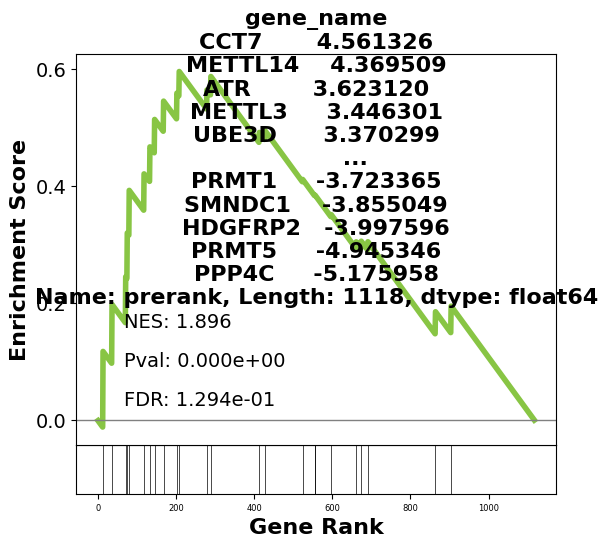

In [26]:
## Plot the GSEA figure for specific term

from gseapy.plot import gseaplot
import matplotlib.pyplot as plt


plt.rcParams["font.size"] = 6
plt.rcParams["font.family"] = "Helvetica"

term_to_plot = df_out['Term'][0]

gseaplot(gsea_res.ranking,  **gsea_res.results[term_to_plot]) # term = str(term_to_plot),

plt.savefig('my_gsea_plot.png',dpi=300,facecolor='white',bbox_inches='tight')

In [21]:
len(list(gsea_res.ranking))


1118

In [ ]:
## Plot the GSEA figures for the top10 terms

for term in df_out['Term'][0:10]:
    gseaplot(pre_res.ranking, **gsea_res.results[term])
       